In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

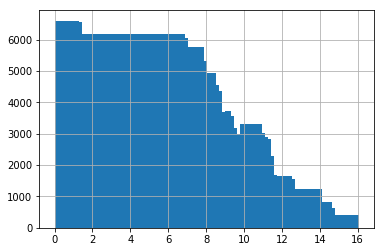

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


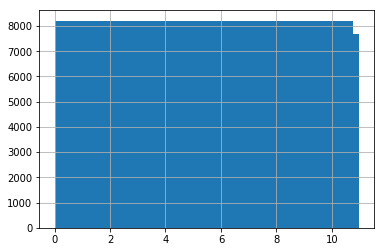

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [28]:
GNO=202
!mkdir -p input/sub/{GNO}

In [29]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/202'

In [30]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [32]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [37]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [38]:
best_mae=1e10

In [39]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, huber_delta,seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [41]:
best={'colsample_bytree': 0.5195128621758713,
 'huber_delta': 1.0334464056698902,
 'learning_rate': 0.003544100331201989,
 'max_depth': 8.243751705775598,
 'min_data_in_leaf': 11.25982209661602,
 'min_sum_hessian_in_leaf': 0.06695552383553482,
 'num_leaves': 86.84503903523397,
 'reg_alpha': 0.015753824888055008,
 'reg_lambda': 9.027729201660977,
 'subsample': 0.5888815261107462}


In [42]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 9962771
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)


/home/hadoop/miniconda2/lib/python2.7/site-packages/lightgbm/sklearn.py:258: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.54827	valid_1's l1: 1.77626
[200]	training's l1: 1.23174	valid_1's l1: 1.54114
[300]	training's l1: 1.06989	valid_1's l1: 1.41347
[400]	training's l1: 0.978498	valid_1's l1: 1.33581
[500]	training's l1: 0.92218	valid_1's l1: 1.28776
[600]	training's l1: 0.883749	valid_1's l1: 1.25689
[700]	training's l1: 0.854656	valid_1's l1: 1.2369
[800]	training's l1: 0.831074	valid_1's l1: 1.22459
[900]	training's l1: 0.810013	valid_1's l1: 1.21664
[1000]	training's l1: 0.79031	valid_1's l1: 1.21175
[1100]	training's l1: 0.771331	valid_1's l1: 1.20871
[1200]	training's l1: 0.754351	valid_1's l1: 1.20694
[1300]	training's l1: 0.740021	valid_1's l1: 1.20538
[1400]	training's l1: 0.725984	valid_1's l1: 1.20469
[1500]	training's l1: 0.713083	valid_1's l1: 1.20421
[1600]	training's l1: 0.700856	valid_1's l1: 1.20431
Early stopping, best iteration is:
[1516]	training's l1: 0.711293	valid_1's l1: 1.20411
write to /home/h

[300]	training's l1: 1.08431	valid_1's l1: 1.1731
[400]	training's l1: 0.991758	valid_1's l1: 1.09844
[500]	training's l1: 0.934006	valid_1's l1: 1.05875
[600]	training's l1: 0.893919	valid_1's l1: 1.03803
[700]	training's l1: 0.863735	valid_1's l1: 1.02645
[800]	training's l1: 0.838356	valid_1's l1: 1.02001
[900]	training's l1: 0.816819	valid_1's l1: 1.01645
[1000]	training's l1: 0.797575	valid_1's l1: 1.01438
[1100]	training's l1: 0.778696	valid_1's l1: 1.01344
[1200]	training's l1: 0.761214	valid_1's l1: 1.01263
[1300]	training's l1: 0.745863	valid_1's l1: 1.01258
[1400]	training's l1: 0.732449	valid_1's l1: 1.01222
[1500]	training's l1: 0.721094	valid_1's l1: 1.0121
[1600]	training's l1: 0.708888	valid_1's l1: 1.01204
Early stopping, best iteration is:
[1584]	training's l1: 0.710649	valid_1's l1: 1.01178
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q10_a11_s9962771.csv
quake  10 (1.0117816320973834, 1584)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Trainin

[700]	training's l1: 0.860708	valid_1's l1: 1.09123
[800]	training's l1: 0.835784	valid_1's l1: 1.09011
[900]	training's l1: 0.814597	valid_1's l1: 1.08978
Early stopping, best iteration is:
[869]	training's l1: 0.820736	valid_1's l1: 1.08964
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q4_a11_s1568301.csv
quake  4 (1.0896424803420013, 869)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.55526	valid_1's l1: 1.61717
[200]	training's l1: 1.23952	valid_1's l1: 1.42127
[300]	training's l1: 1.07796	valid_1's l1: 1.34256
[400]	training's l1: 0.986492	valid_1's l1: 1.30573
[500]	training's l1: 0.929587	valid_1's l1: 1.28869
[600]	training's l1: 0.890385	valid_1's l1: 1.2817
[700]	training's l1: 0.859786	valid_1's l1: 1.27797
[800]	training's l1: 0.83473	valid_1's l1: 1.27689
[900]	training's l1: 0.813122	valid_1's l1: 1.27693
Early stopping, best iteration is:
[833]	training's l1: 0.8271

Early stopping, best iteration is:
[771]	training's l1: 0.845375	valid_1's l1: 1.05898
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q13_a11_s1568301.csv
quake  13 (1.0589792535622586, 771)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.52854	valid_1's l1: 1.8754
[200]	training's l1: 1.21127	valid_1's l1: 1.66516
[300]	training's l1: 1.04765	valid_1's l1: 1.56113
[400]	training's l1: 0.955648	valid_1's l1: 1.50922
[500]	training's l1: 0.898535	valid_1's l1: 1.48269
[600]	training's l1: 0.859444	valid_1's l1: 1.46839
[700]	training's l1: 0.830014	valid_1's l1: 1.46157
[800]	training's l1: 0.805859	valid_1's l1: 1.45728
[900]	training's l1: 0.785821	valid_1's l1: 1.45498
[1000]	training's l1: 0.767346	valid_1's l1: 1.45394
[1100]	training's l1: 0.749948	valid_1's l1: 1.45404
Early stopping, best iteration is:
[1040]	training's l1: 0.76026	valid_1's l1: 1.45379
write to /home/hadoop

write to /home/hadoop/lanlep2019/input/sub/202/sub202_q7_a11_s2613353.csv
quake  7 (1.3911611937795394, 1364)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.55089	valid_1's l1: 1.55438
[200]	training's l1: 1.23553	valid_1's l1: 1.39581
[300]	training's l1: 1.07401	valid_1's l1: 1.34168
[400]	training's l1: 0.982417	valid_1's l1: 1.32661
[500]	training's l1: 0.925287	valid_1's l1: 1.3242
[600]	training's l1: 0.886419	valid_1's l1: 1.32524
Early stopping, best iteration is:
[549]	training's l1: 0.904729	valid_1's l1: 1.32388
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q8_a11_s2613353.csv
quake  8 (1.3238806921184485, 549)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.57026	valid_1's l1: 1.49164
[200]	training's l1: 1.25575	valid_1's l1: 1.15972
[300]	training's l1: 1.09278	valid_1's

[1200]	training's l1: 0.743449	valid_1's l1: 1.33062
[1300]	training's l1: 0.72879	valid_1's l1: 1.32901
[1400]	training's l1: 0.715392	valid_1's l1: 1.32728
[1500]	training's l1: 0.703207	valid_1's l1: 1.32629
[1600]	training's l1: 0.69184	valid_1's l1: 1.32565
[1700]	training's l1: 0.680516	valid_1's l1: 1.32534
[1800]	training's l1: 0.669839	valid_1's l1: 1.32532
Early stopping, best iteration is:
[1721]	training's l1: 0.678366	valid_1's l1: 1.32521
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q2_a11_s6851674.csv
quake  2 (1.3252120446561657, 1721)
valid quake 3
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.57307	valid_1's l1: 1.34918
[200]	training's l1: 1.25637	valid_1's l1: 1.02724
[300]	training's l1: 1.0938	valid_1's l1: 0.901452
[400]	training's l1: 1.00055	valid_1's l1: 0.853254
[500]	training's l1: 0.942564	valid_1's l1: 0.834824
[600]	training's l1: 0.902414	valid_1's l1: 0.829
[7

[400]	training's l1: 0.993142	valid_1's l1: 1.09265
[500]	training's l1: 0.935475	valid_1's l1: 1.06138
[600]	training's l1: 0.895621	valid_1's l1: 1.04703
[700]	training's l1: 0.86471	valid_1's l1: 1.0403
[800]	training's l1: 0.83963	valid_1's l1: 1.03758
[900]	training's l1: 0.817724	valid_1's l1: 1.03637
[1000]	training's l1: 0.798681	valid_1's l1: 1.03658
Early stopping, best iteration is:
[962]	training's l1: 0.805754	valid_1's l1: 1.03591
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q11_a11_s6851674.csv
quake  11 (1.0359063781005597, 962)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.5679	valid_1's l1: 1.44394
[200]	training's l1: 1.25277	valid_1's l1: 1.13924
[300]	training's l1: 1.09093	valid_1's l1: 1.01758
[400]	training's l1: 0.998787	valid_1's l1: 0.965844
[500]	training's l1: 0.941086	valid_1's l1: 0.941282
[600]	training's l1: 0.901231	valid_1's l1: 0.929601
[700]

[100]	training's l1: 1.5533	valid_1's l1: 1.82948
[200]	training's l1: 1.238	valid_1's l1: 1.60247
[300]	training's l1: 1.07544	valid_1's l1: 1.50041
[400]	training's l1: 0.983426	valid_1's l1: 1.44553
[500]	training's l1: 0.926133	valid_1's l1: 1.41503
[600]	training's l1: 0.88665	valid_1's l1: 1.39933
[700]	training's l1: 0.857059	valid_1's l1: 1.38955
[800]	training's l1: 0.832266	valid_1's l1: 1.38245
[900]	training's l1: 0.811266	valid_1's l1: 1.37823
[1000]	training's l1: 0.792625	valid_1's l1: 1.37524
[1100]	training's l1: 0.774696	valid_1's l1: 1.37395
[1200]	training's l1: 0.75857	valid_1's l1: 1.37308
[1300]	training's l1: 0.744221	valid_1's l1: 1.37186
[1400]	training's l1: 0.73162	valid_1's l1: 1.37188
Early stopping, best iteration is:
[1321]	training's l1: 0.741531	valid_1's l1: 1.37162
write to /home/hadoop/lanlep2019/input/sub/202/sub202_q6_a11_s3070449.csv
quake  6 (1.371616121461771, 1321)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until vali

write to /home/hadoop/lanlep2019/input/sub/202/sub202_q15_a11_s3070449.csv
quake  15 (1.095214780380107, 483)
mean score 1.150808687615361


In [43]:
scores,np.mean(scores)

([1.15156091879594,
  1.1511652455122068,
  1.1515652169897392,
  1.1508508606372527,
  1.150808687615361],
 1.1511901859101)

In [44]:
files= !ls /mnt/lanlep2019/input/sub/202/sub202*
len(files)

75

In [45]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [46]:
b.head()

sub202_q10_a11_s1568301  sub202_q10_a11_s2613353  \
seg_id                                                         
seg_05a1b0                 3.749416                 3.649477   
seg_f0181d                 4.032759                 4.150767   
seg_5b7325                 3.220445                 3.257615   
seg_c6b514                 2.507417                 2.474779   
seg_52c139                10.191398                10.118007   

            sub202_q10_a11_s3070449  sub202_q10_a11_s6851674  \
seg_id                                                         
seg_05a1b0                 3.868962                 3.679771   
seg_f0181d                 3.965753                 4.019029   
seg_5b7325                 3.256793                 3.373825   
seg_c6b514                 2.358457                 2.321080   
seg_52c139                10.245200                10.113046   

            sub202_q10_a11_s9962771  sub202_q11_a11_s1568301  \
seg_id                                                         
seg_05a1b0                 3.785871                 4.077121   
seg_f0181d                 4.108722                 3.992642   
seg_5b7325                 3.390987                 2.996476   
seg_c6b514                 2.430294                 2.793042   
seg_52c139                10.143367                10.144789   

            sub202_q11_a11_s2613353  sub202_q11_a11_s3070449  \
seg_id                                                         
seg_05a1b0                 3.921489                 3.698222   
seg_f0181d                 4.075550                 3.945902   
seg_5b7325                 2.934762                 2.937212   
seg_c6b514                 2.907327                 2.884123   
seg_52c139                10.200970                10.139095   

            sub202_q11_a11_s6851674  sub202_q11_a11_s9962771  \
seg_id                                                         
seg_05a1b0                 3.846139                 3.748879   
seg_f0181d                 4.042842                 3.977954   
seg_5b7325                 2.977913                 2.998014   
seg_c6b514                 2.894560                 2.830381   
seg_52c139                10.113905                10.030904   

                     ...            sub202_q8_a11_s1568301  \
seg_id               ...                                     
seg_05a1b0           ...                          3.997856   
seg_f0181d           ...                          4.180723   
seg_5b7325           ...                          3.502377   
seg_c6b514           ...                          2.712379   
seg_52c139           ...                         10.125746   

            sub202_q8_a11_s2613353  sub202_q8_a11_s3070449  \
seg_id                                                       
seg_05a1b0                4.126133                4.080104   
seg_f0181d                4.136557                4.154398   
seg_5b7325                3.696876                3.704913   
seg_c6b514                2.836946                2.998834   
seg_52c139               10.179289               10.164311   

            sub202_q8_a11_s6851674  sub202_q8_a11_s9962771  \
seg_id                                                       
seg_05a1b0                4.187956                4.077150   
seg_f0181d                4.293907                4.200215   
seg_5b7325                3.870163                3.694472   
seg_c6b514                3.120244                2.913806   
seg_52c139               10.021712               10.146328   

            sub202_q9_a11_s1568301  sub202_q9_a11_s2613353  \
seg_id                                                       
seg_05a1b0                4.029820                4.000757   
seg_f0181d                3.984245                4.019359   
seg_5b7325                3.180557                3.127502   
seg_c6b514                2.632323                2.805239   
seg_52c139               10.243978               10.105179   

            sub202_q9_a11_s

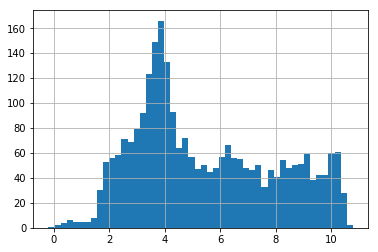

In [47]:
b.mean(1).hist(bins=50);

In [56]:
(b.mean(1)>9.75).sum() 

187

In [48]:
np.abs(b.median(1)-b.mean(1)).mean()

0.02092275798734979

In [49]:
b.mean(1).mean(),b.median(1).mean()

(5.451272730895089, 5.459217785444432)

In [50]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub202_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [51]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub202_a11.csv".format('median'))
p.to_csv(fname,index=None)